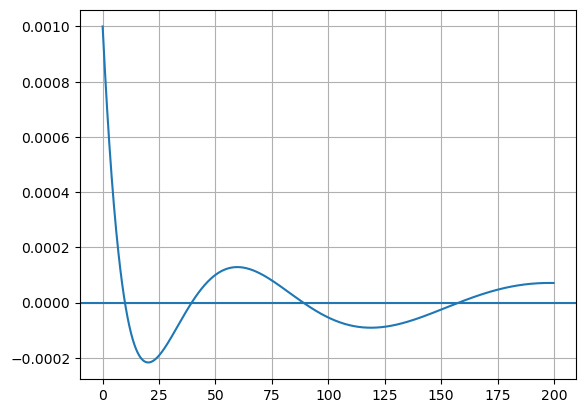

In [6]:
# Nescessary imports
import numpy as np
from scipy.integrate import odeint, simps
from scipy.optimize import bisect
import matplotlib.pyplot as plt

# Function definition with the derivatives
def f(u, x, E):
    y, z = u
    f1, f2, = z, (V - E)*y
    return [f1, f2]

# Solution by odeint()
def shoot(E):
    sol = odeint(f, u, x, args = (E, ))
    return sol[:, 0][-1]

# Parameters and variables
V = 0                                      # Potential energy for Infinite Square Well
energies = np.arange(0, 200, 0.2)           # Range of energy to scan
x = np.linspace(0, 1, 100)                # x-scale (width of pot. = 1)
u = [0, 0.001]                          # Initial values of y and z

# Shooting for a range of energy values
hits = [shoot(E) for E in energies]

# Plot to locate eigen energies
plt.plot(energies, hits)
plt.axhline()
plt.grid()
plt.show()

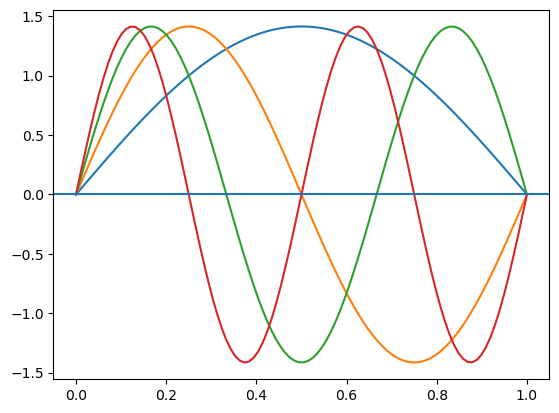

In [7]:
# Eigenenergy by root finding method
E1 = bisect(shoot, 0, 25)             # Ground state by bisection method
E2 = bisect(shoot, 25, 50)             # First excited state by bisection method
E3 = bisect(shoot, 75, 100)             # Second excited state by bisection method
E4 = bisect(shoot, 150, 175)             # Third excited state by bisection method

# Solution corresponding to the eigen energy
sol_1 = odeint(f, u, x, args = (E1, ))
sol_2 = odeint(f, u, x, args = (E2, ))
sol_3 = odeint(f, u, x, args = (E3, ))
sol_4 = odeint(f, u, x, args = (E4, ))

psi_1 = sol_1[:, 0]
psi_2 = sol_2[:, 0]
psi_3 = sol_3[:, 0]
psi_4 = sol_4[:, 0]

# Normalized wave functions
N = 1/np.sqrt(simps(psi_1*psi_1, x))
psi_1_normal = N*psi_1

N = 1/np.sqrt(simps(psi_2*psi_2, x))
psi_2_normal = N*psi_2

N = 1/np.sqrt(simps(psi_3*psi_3, x))
psi_3_normal = N*psi_3

N = 1/np.sqrt(simps(psi_4*psi_4, x))
psi_4_normal = N*psi_4

# Ploting Normalized Eigenfunctions
plt.plot(x, psi_1_normal)
plt.plot(x, psi_2_normal)
plt.plot(x, psi_3_normal)
plt.plot(x, psi_4_normal)
plt.axhline()
plt.show()